In [1]:
import pandas as pd
import plotly.express as px
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# read in the split failure data
sf_data_raw = pd.read_excel('data/SplitFailures.xlsx')
# If 'Implementation' column is read as object/string, convert it to categorical with desired order
sf_data_raw['Implementation'] = pd.Categorical(sf_data_raw['Implementation'], categories=['Before', 'After'], ordered=True)
sf_data_raw

,Date,Implementation,Plan,SignalID,Signal Name,Movement,Phase,Split Fail,%
0,2024-09-19,Before,13,7813,1280N,SBL,1,8,9.0
1,2024-09-19,Before,13,7813,1280N,NBT,2,2,2.0
2,2024-09-19,Before,13,7813,1280N,WBL,3,8,9.0
3,2024-09-19,Before,13,7813,1280N,EBT,4,1,1.0
4,2024-09-19,Before,13,7813,1280N,NBL,5,61,69.0
...,...,...,...,...,...,...,...,...,...
91,2024-10-19,After,13,7814,1000N,EBT,4,48,54.0
92,2024-10-19,After,13,7814,1000N,NBL,5,35,56.0
93,2024-10-19,After,13,7814,1000N,SBT,6,25,40.0
94,2024-10-19,After,13,7814,1000N,EBL,7,9,10.0


In [2]:
# get average over days
avg_df = sf_data_raw.groupby(['Implementation', 'Plan', 'Signal Name', 'Movement', 'Phase'], observed=True)['%'].mean().round(2).reset_index()
avg_df

,Implementation,Plan,Signal Name,Movement,Phase,%
0,Before,13,1000N,EBL,7,19.33
1,Before,13,1000N,EBT,4,80.00
2,Before,13,1000N,NBL,5,53.67
3,Before,13,1000N,NBT,2,42.67
4,Before,13,1000N,SBL,1,80.00
5,Before,13,1000N,SBT,6,54.33
6,Before,13,1000N,WBL,3,75.33
7,Before,13,1000N,WBT,8,25.67
8,Before,13,1280N,EBL,7,66.00
9,Before,13,1280N,EBT,4,1.00


In [3]:
# Pivot the DataFrame by implementation
pivot_df = avg_df.pivot_table(index=['Signal Name', 'Movement', 'Phase'], columns='Implementation', values='%', observed=True)
pivot_df['Difference'] = pivot_df['After'] - pivot_df['Before']
pivot_df['% Change'] = (((pivot_df['After'] - pivot_df['Before']) / pivot_df['Before']) * 100).round(2)
pivot_df


Implementation              Before  After  Difference  % Change
Signal Name Movement Phase                                     
1000N       EBL      7       19.33  10.00       -9.33    -48.27
            EBT      4       80.00  68.67      -11.33    -14.16
            NBL      5       53.67  56.00        2.33      4.34
            NBT      2       42.67  42.33       -0.34     -0.80
            SBL      1       80.00  72.67       -7.33     -9.16
            SBT      6       54.33  52.33       -2.00     -3.68
            WBL      3       75.33  59.33      -16.00    -21.24
            WBT      8       25.67  16.33       -9.34    -36.38
1280N       EBL      7       66.00  57.33       -8.67    -13.14
            EBT      4        1.00   0.67       -0.33    -33.00
            NBL      5       77.00  76.67       -0.33     -0.43
            NBT      2        2.00   1.00       -1.00    -50.00
            SBL      1        7.00   3.00       -4.00    -57.14
            SBT      6       34.00  22.00      -12.00    -35.29
            WBL      3        6.00   7.67        1.67     27.83
            WBT      8       33.00  28.67       -4.33    -13.12

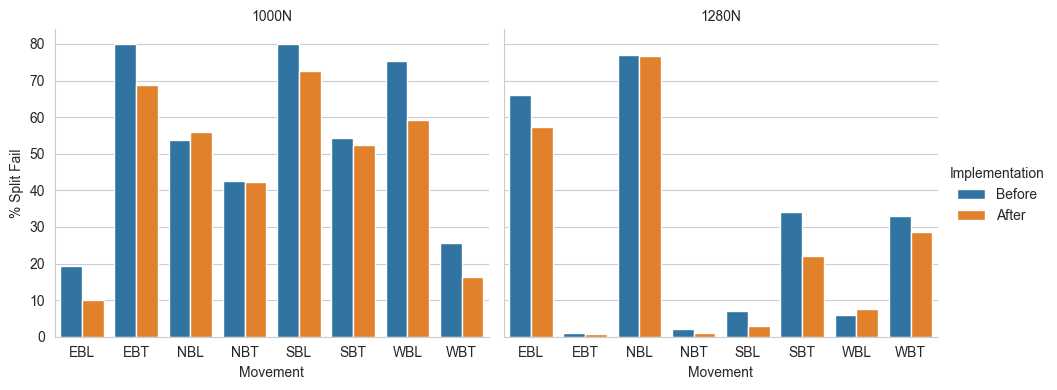

In [6]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot with faceting by ID
g = sns.catplot(x="Movement", y="%", hue="Implementation", data=avg_df, kind="bar", col="Signal Name", height=4, aspect=1.2)

# Set titles and axis labels
g.set_titles("{col_name}")
g.set_xlabels("Movement")
g.set_ylabels("% Split Fail")

# Show the plot
plt.show()
